In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import shap

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

/d/Docs/uni/25fal/DSK807_ Applied machine learning, autumn 25/aml_exam/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("./results/deep/y_pred.csv")
print(df.head())
print(df.columns)


          0
0  0.012779
1  0.108998
2  0.299341
3  0.292051
4  0.789566
Index(['0'], dtype='object')


In [4]:
X_test = pd.read_csv("./results/deep/X_test.csv")
y_test = pd.read_csv("./results/deep/y_test.csv")["Churn"]
y_pred = pd.read_csv("./results/deep/y_pred.csv")["0"]

In [5]:
shap_values = np.load("./results/deep/shap_values.npy")
base_values = np.load("./results/deep/expected_values.npy")

In [7]:
print("X_test:", X_test.shape)
print("shap_values:", shap_values.shape)
print("base_values:", base_values.shape)

X_test: (1407, 46)
shap_values: (1407, 46)
base_values: (1407,)


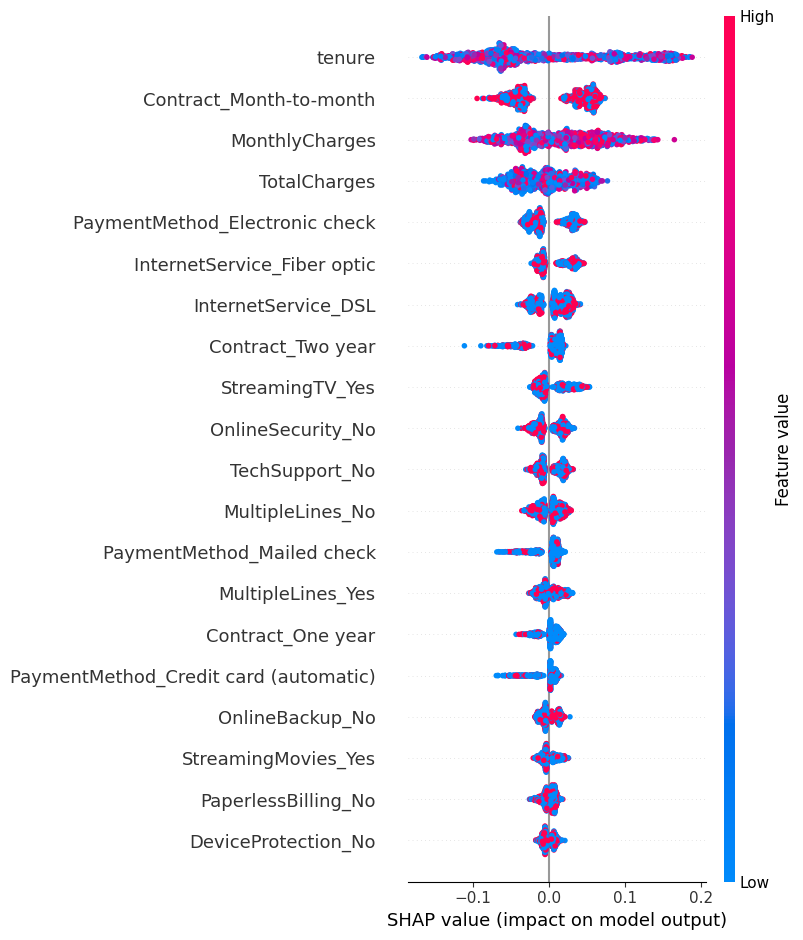

In [8]:
import shap

shap.summary_plot(
    shap_values,
    X_test,
    plot_type="dot"
)


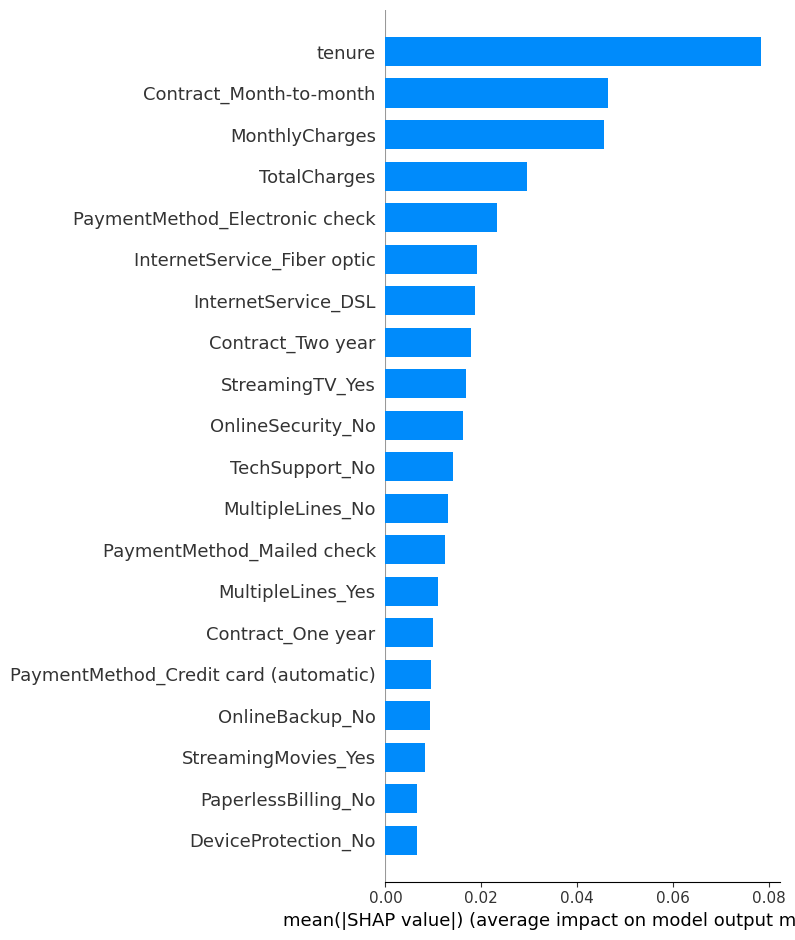

In [9]:
shap.summary_plot(
    shap_values,
    X_test,
    plot_type="bar"
)


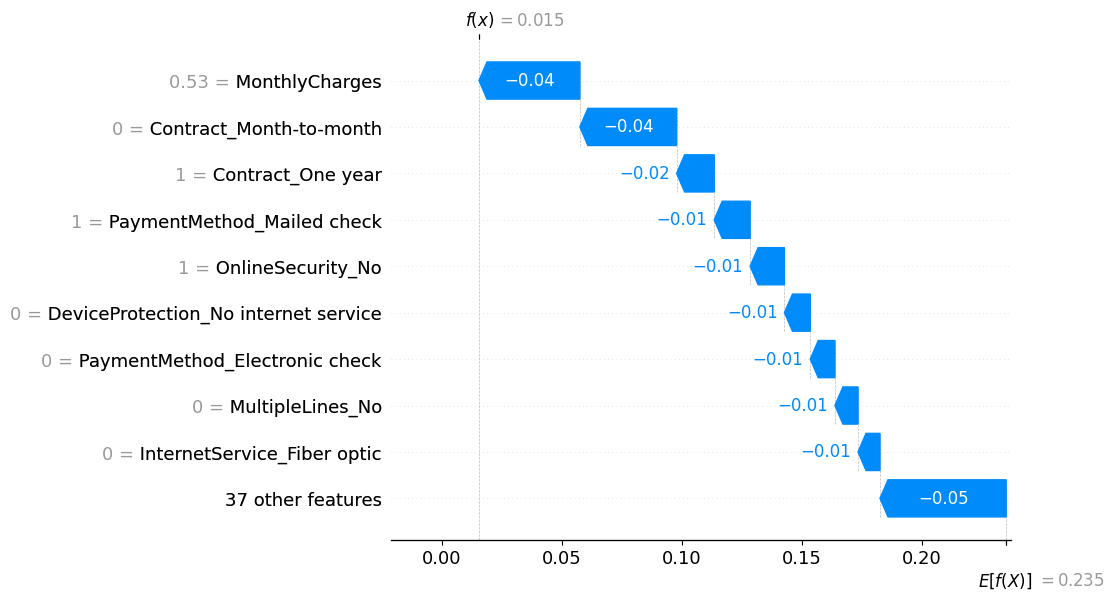

In [10]:
i = 10  # any row
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[i],
        base_values=base_values[i],
        data=X_test.iloc[i],
        feature_names=X_test.columns
    )
)


In [16]:
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = y_pred.reset_index(drop=True)

results = X_test_reset.copy()
results["Actual"] = y_test_reset
results["Predicted"] = y_pred_reset

false_negatives = results[(results["Actual"] == 1) & (results["Predicted"] == 0)]
fn_indices = false_negatives.index


In [17]:
results = X_test.copy()
results["Actual"] = y_test.values
results["Predicted"] = y_pred.values

false_negatives = results[(results["Actual"] == 1) & (results["Predicted"] == 0)]
fn_indices = false_negatives.index


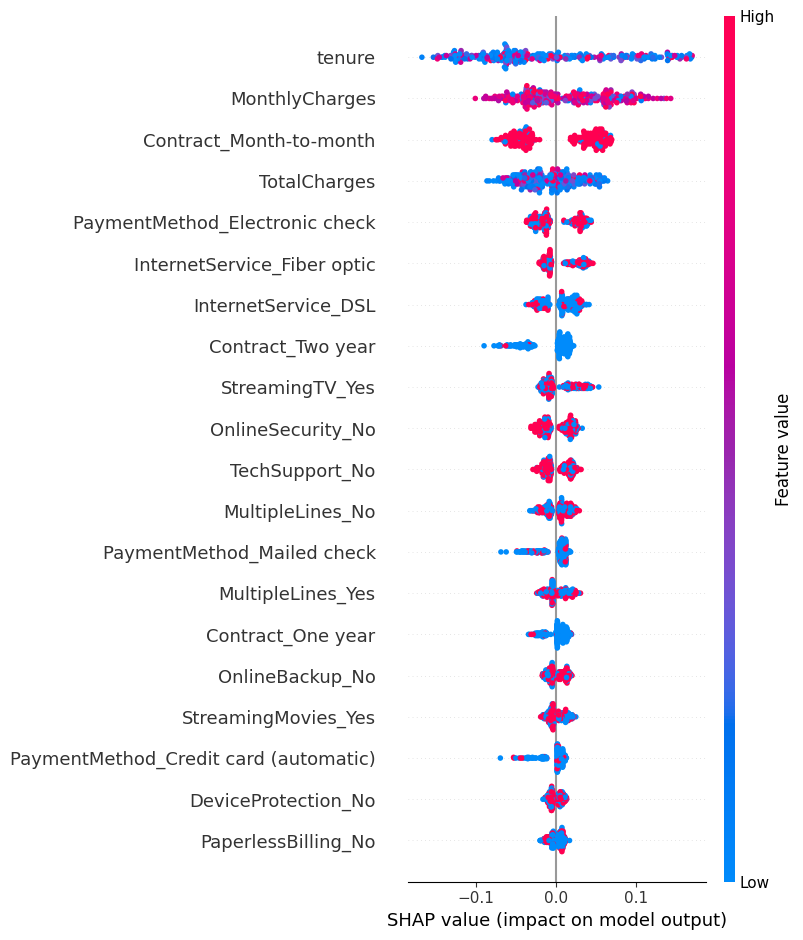

In [27]:
shap.summary_plot(
    shap_values[fn_indices],
    X_test.iloc[fn_indices],
    plot_type="dot"
)


In [19]:
print(false_negatives.shape)
print(fn_indices)


(0, 48)
Index([], dtype='int64')


no false negatives?? are we overfitting?

what about false positives?

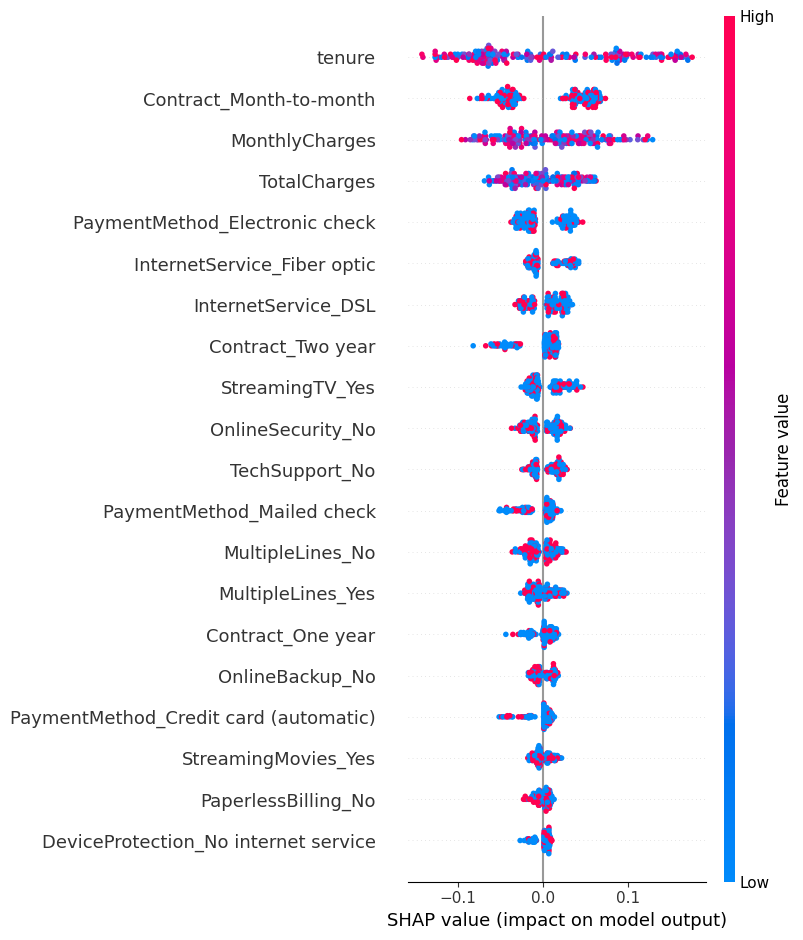

In [28]:
false_positives = results[(results["Actual"] == 0) & (results["Predicted"] == 1)]
fp_indices = false_positives.index

shap.summary_plot(
    shap_values[fp_indices],
    X_test.iloc[fp_indices],
    plot_type="dot"
)


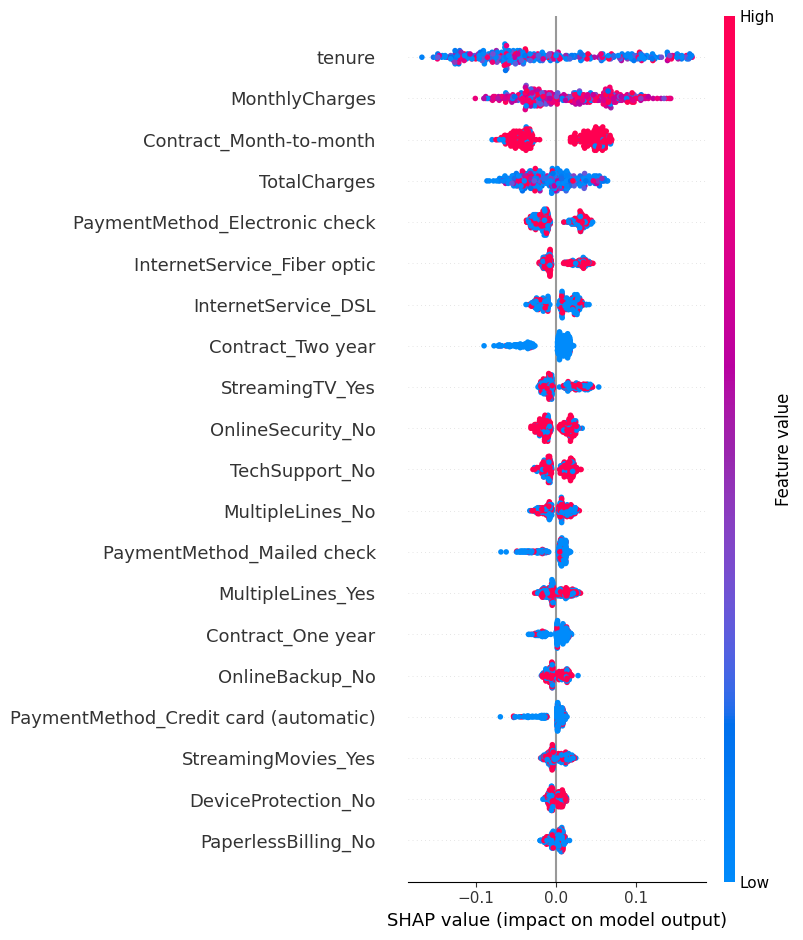

In [20]:
churners = results[results["Actual"] == 1]
churn_idx = churners.index

shap.summary_plot(
    shap_values[churn_idx],
    X_test_reset.iloc[churn_idx],
    plot_type="dot"
)


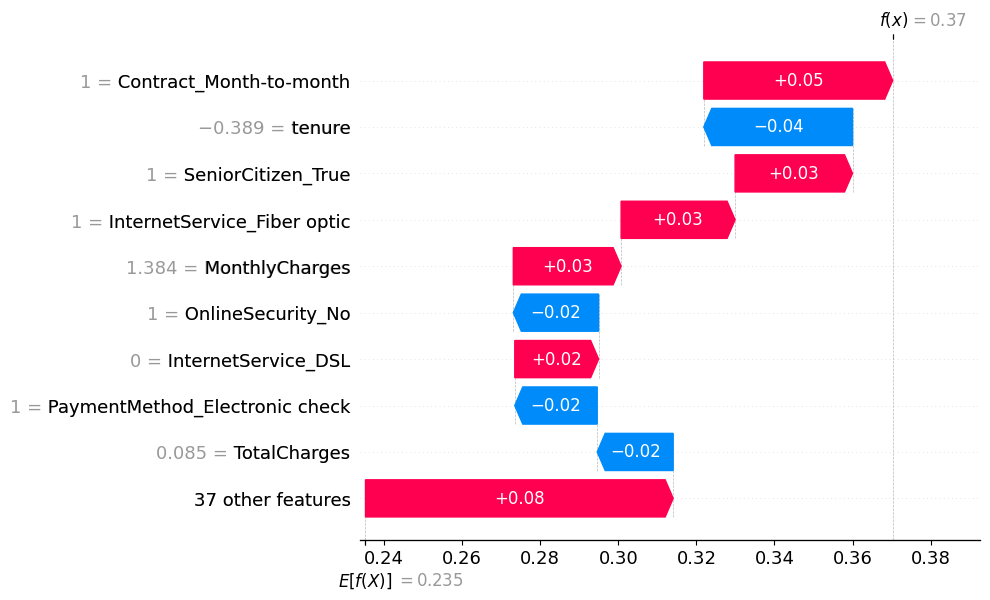

In [29]:
idx = fn_indices[0]

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[idx],
        base_values=base_values[idx] if len(base_values) > 1 else base_values[0],
        data=X_test.iloc[idx],
        feature_names=X_test.columns
    )
)


In [21]:
false_negatives.shape
results["Actual"].value_counts()
results["Predicted"].value_counts()


Predicted
0.104226    2
0.098961    2
0.245790    2
0.208785    1
0.272965    1
           ..
0.221032    1
0.389322    1
0.069309    1
0.008609    1
0.088723    1
Name: count, Length: 1404, dtype: int64

In [22]:
y_pred_proba = pd.read_csv("./results/deep/y_pred.csv")["0"]

y_pred = (y_pred_proba >= 0.5).astype(int)


In [23]:
results = X_test.copy()
results["Actual"] = y_test.values
results["Predicted"] = y_pred.values


In [24]:
results["Predicted"].value_counts()


Predicted
0    1154
1     253
Name: count, dtype: int64

In [25]:
false_negatives = results[(results["Actual"] == 1) & (results["Predicted"] == 0)]
fn_indices = false_negatives.index
print(false_negatives.shape)


(317, 48)


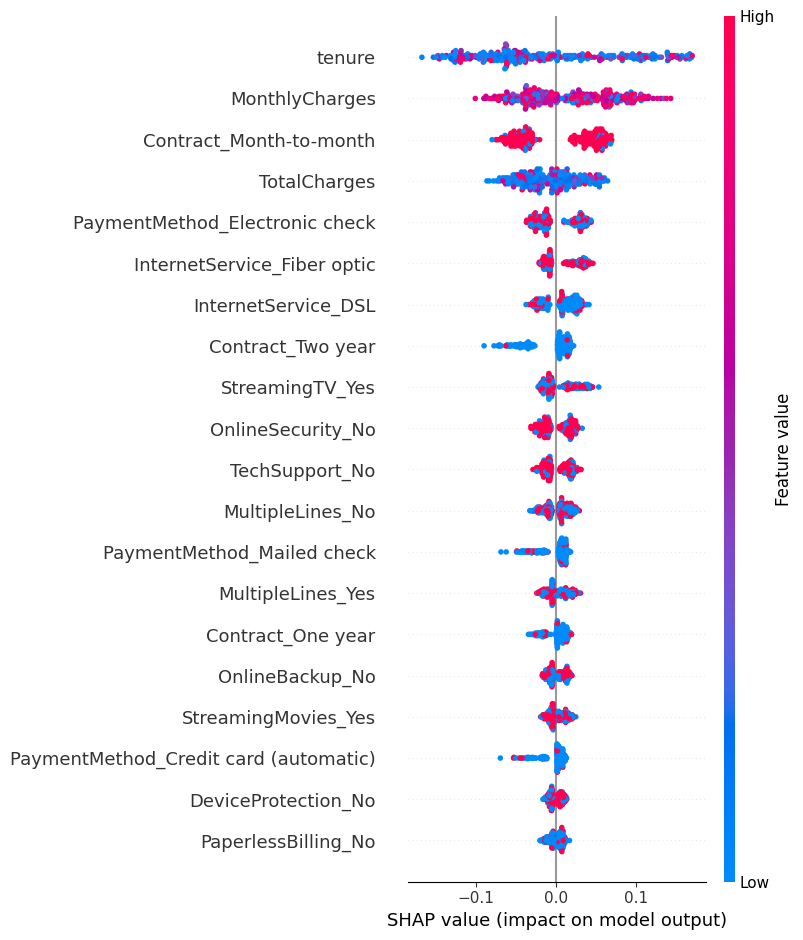

In [26]:
shap.summary_plot(
    shap_values[fn_indices],
    X_test.iloc[fn_indices],
    plot_type="dot"
)


In [30]:
import pandas as pd

y_pred_proba = pd.read_csv("./results/deep/y_pred.csv")["0"]
y_pred = (y_pred_proba >= 0.5).astype(int)


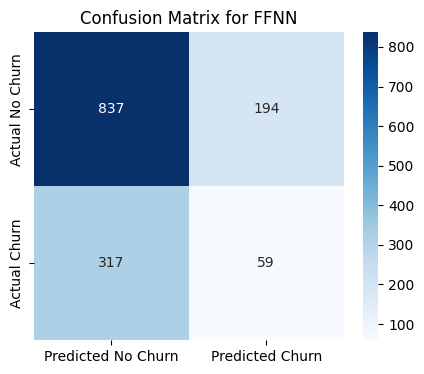

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1031
           1       0.23      0.16      0.19       376

    accuracy                           0.64      1407
   macro avg       0.48      0.48      0.48      1407
weighted avg       0.59      0.64      0.61      1407



In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted No Churn", "Predicted Churn"],
    yticklabels=["Actual No Churn", "Actual Churn"]
)
plt.title("Confusion Matrix for FFNN")
plt.show()

print(classification_report(y_test, y_pred))

